# 客户流失分析

## 一、概述

- 携程作为中国领先的综合性旅行服务公司，每天向超过2.5亿会员提供全方位的旅行服务，然而随着国外公司大举进入中国市场，携程的一些客户流失，领先地位可能不保。我们会深入了解用户画像及行为偏好，挖掘出影响用户流失的关键因素，并通过算法预测客户访问的转化结果，从而更好地完善产品设计、提升用户体验。  
- 此次数据是携程用户的访问数据，为保护客户隐私，已经将数据进行了脱敏，和实际商品的订单量、浏览量、转化率等有一些差距，不影响问题的可解性。数据集下载的地址为：https://www.kesci.com/home/competition/579ef89745fdbfad5b3cbc1e

## 二、读取数据

### 2.1 理解数据

- 可以看到变量比较的多，先进行分类，除去目标变量label，此数据集的字段可以分成三个类别：订单相关指标、客户行为相关指标、酒店相关指标。

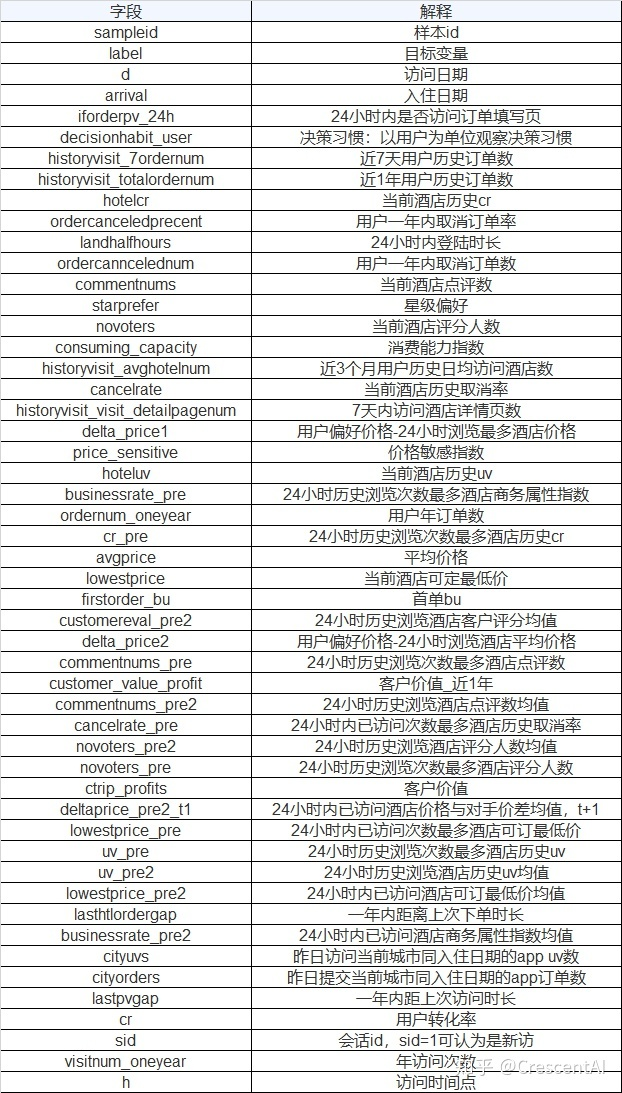

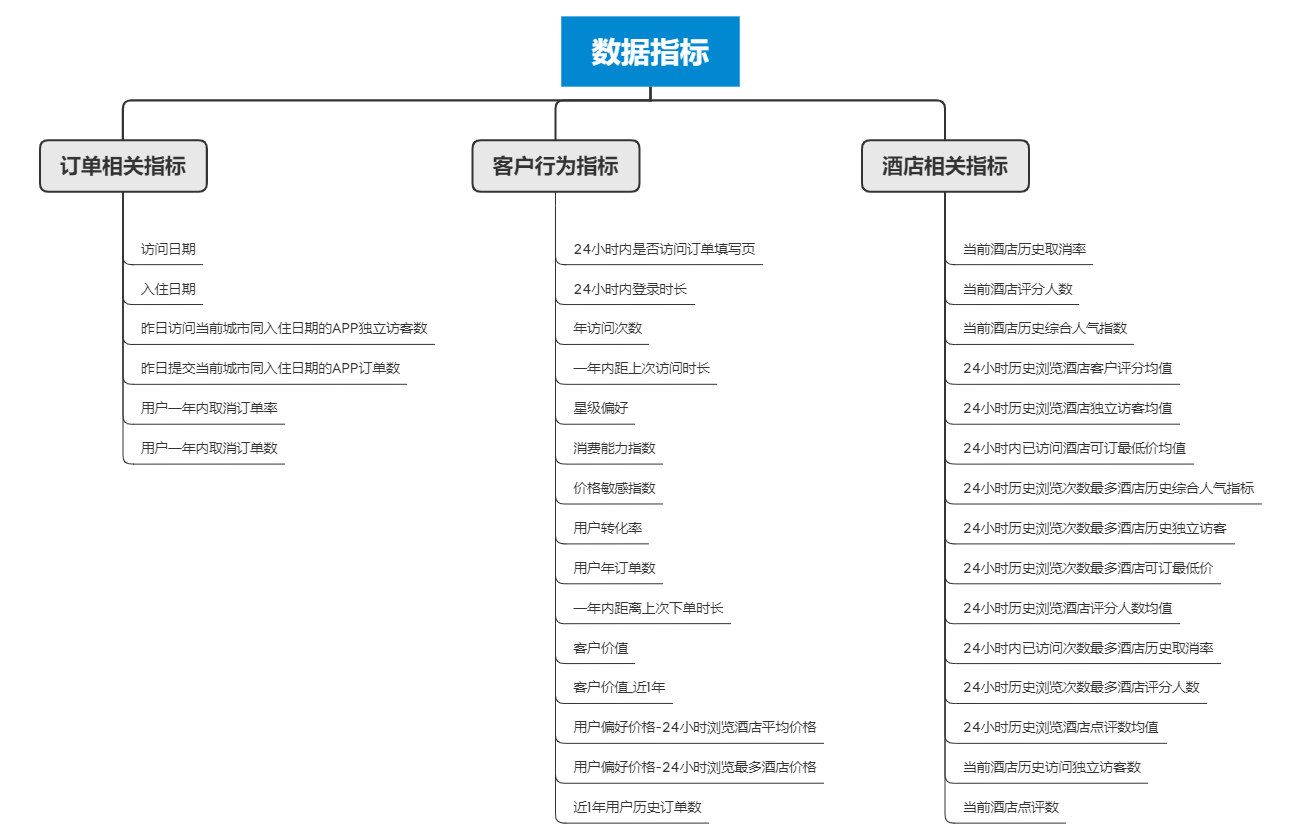

### 2.2 导入相关库及数据

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题


In [2]:
# 显示全部特征
pd.set_option('display.max_columns', None)

# 导入数据
df = pd.read_csv('C:/Users/zhuangshuting/Desktop/客户流失预测数据集/userlostprob_train.txt',sep='\t',encoding='UTF-8')
df.head()

,label,sampleid,d,arrival,iforderpv_24h,decisionhabit_user,historyvisit_7ordernum,historyvisit_totalordernum,hotelcr,ordercanceledprecent,landhalfhours,ordercanncelednum,commentnums,starprefer,novoters,consuming_capacity,historyvisit_avghotelnum,cancelrate,historyvisit_visit_detailpagenum,delta_price1,price_sensitive,hoteluv,businessrate_pre,ordernum_oneyear,cr_pre,avgprice,lowestprice,firstorder_bu,customereval_pre2,delta_price2,commentnums_pre,customer_value_profit,commentnums_pre2,cancelrate_pre,novoters_pre2,novoters_pre,ctrip_profits,deltaprice_pre2_t1,lowestprice_pre,uv_pre,uv_pre2,lowestprice_pre2,lasthtlordergap,businessrate_pre2,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
0,0,24636,2016-05-18,2016-05-18,0,NaN,NaN,NaN,1.04,NaN,22.0,NaN,1089.0,NaN,1933.0,NaN,NaN,1261.0,NaN,NaN,NaN,102.607,0.25,NaN,1.03,NaN,49.0,NaN,3.2,NaN,724.0,NaN,844.0,0.03,1335.0,1249.0,NaN,29.0,46.0,58.027,74.956,615.0,NaN,0.29,12.880,3.147,NaN,NaN,7,NaN,12
1,1,24637,2016-05-18,2016-05-18,0,NaN,NaN,NaN,1.06,NaN,0.0,NaN,5612.0,NaN,6852.0,NaN,NaN,3205.0,NaN,NaN,NaN,278.373,0.51,NaN,1.07,NaN,619.0,NaN,4.9,NaN,5610.0,NaN,3789.0,0.21,5430.0,7829.0,NaN,-56.0,111.0,249.347,224.920,513.0,NaN,0.53,17.933,4.913,NaN,NaN,33,NaN,14
2,0,24641,2016-05-18,2016-05-19,0,NaN,NaN,NaN,1.05,NaN,3.0,NaN,256.0,NaN,367.0,NaN,NaN,194.0,NaN,NaN,NaN,16.133,0.61,NaN,1.12,NaN,312.0,NaN,3.9,NaN,4721.0,NaN,4341.0,0.52,5353.0,7324.0,NaN,8.0,413.0,133.093,112.063,382.0,NaN,0.60,3.993,0.760,NaN,NaN,10,NaN,19
3,0,24642,2016-05-18,2016-05-18,0,NaN,NaN,NaN,1.01,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,1.780,NaN,NaN,1.01,NaN,198.0,NaN,2.1,NaN,41.0,NaN,529.0,0.53,1004.0,81.0,NaN,-7.0,188.0,4.600,58.844,203.0,NaN,0.18,3.220,0.660,NaN,NaN,8,NaN,16
4,1,24644,2016-05-18,2016-05-19,0,NaN,NaN,NaN,1.00,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.073,NaN,NaN,1.03,NaN,NaN,NaN,1.5,NaN,NaN,NaN,NaN,1.00,1.0,NaN,NaN,-5.0,NaN,0.213,0.157,84.0,NaN,NaN,0.013,NaN,NaN,NaN,1,NaN,21


In [3]:
# 查看数据维度
df.shape

(689945, 51)

In [4]:
# 查看数据类型
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689945 entries, 0 to 689944
Data columns (total 51 columns):
label                               689945 non-null int64
sampleid                            689945 non-null int64
d                                   689945 non-null object
arrival                             689945 non-null object
iforderpv_24h                       689945 non-null int64
decisionhabit_user                  385450 non-null float64
historyvisit_7ordernum              82915 non-null float64
historyvisit_totalordernum          386525 non-null float64
hotelcr                             689148 non-null float64
ordercanceledprecent                447831 non-null float64
landhalfhours                       661312 non-null float64
ordercanncelednum                   447831 non-null float64
commentnums                         622029 non-null float64
starprefer                          464892 non-null float64
novoters                            672918 non-null float6

In [5]:
# 查看缺失值占比
df.isnull().mean()

label                               0.000000
sampleid                            0.000000
d                                   0.000000
arrival                             0.000000
iforderpv_24h                       0.000000
decisionhabit_user                  0.441332
historyvisit_7ordernum              0.879824
historyvisit_totalordernum          0.439774
hotelcr                             0.001155
ordercanceledprecent                0.350918
landhalfhours                       0.041500
ordercanncelednum                   0.350918
commentnums                         0.098437
starprefer                          0.326190
novoters                            0.024679
consuming_capacity                  0.327719
historyvisit_avghotelnum            0.437816
cancelrate                          0.016984
historyvisit_visit_detailpagenum    0.554698
delta_price1                        0.366405
price_sensitive                     0.327719
hoteluv                             0.001155
businessra

In [6]:
# 查看标签分布
df['label'].value_counts()  # 0代表没有流失的客户，1代表已经流失的客户

0    500588
1    189357
Name: label, dtype: int64

In [7]:
# 流失客户占比
print('客户流失比率：{0:.2%}'.format(df['label'].value_counts()[1]/df['label'].value_counts()[0]))

客户流失比率：37.83%


In [8]:
# 描述性统计
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,689945.0,0.274452,0.446238,0.000,0.000,0.000,1.000,1.000
sampleid,689945.0,628540.209625,414681.498697,24636.000,312320.000,599637.000,887460.000,2238426.000
iforderpv_24h,689945.0,0.193737,0.395226,0.000,0.000,0.000,0.000,1.000
decisionhabit_user,385450.0,5.317048,38.524483,0.000,2.000,3.000,5.000,3167.000
historyvisit_7ordernum,82915.0,1.856094,2.103862,1.000,1.000,1.000,2.000,106.000
historyvisit_totalordernum,386525.0,11.710487,17.251429,1.000,2.000,6.000,14.000,711.000
hotelcr,689148.0,1.060996,0.045264,1.000,1.030,1.050,1.090,3.180
ordercanceledprecent,447831.0,0.342119,0.354210,0.000,0.000,0.250,0.570,1.000
landhalfhours,661312.0,6.086366,12.413225,0.000,0.000,0.000,4.000,49.000
ordercanncelednum,447831.0,154.179369,398.456986,0.000,0.000,2.000,153.000,13475.000


## 三、特征工程

### 3.1 数据预处理

In [9]:
# 数据备份
rawdf = df.copy()

### 3.1.1 数据类型转换
- 字符串类型的特征需要处理成数值型才能建模，将arrival和d相减得到"提前预定的天数"，作为新的特征.

In [10]:
## 增加列 
# 将两个日期变量由字符串转换为日期型格式
rawdf['arrival'] = pd.to_datetime(rawdf['arrival'])
rawdf['d'] = pd.to_datetime(rawdf['d'])

# 生成提前预定时间列（衍生变量）
rawdf['day_advanced'] = (rawdf['arrival']-rawdf['d']).dt.days

## 删除列
rawdf = rawdf.drop(['sampleid','d','arrival'], axis=1)

### 3.1.2 异常值处理
- 将customer_value_profit、ctrip_profits中的负值按0处理  
- 将delta_price1、delta_price2、lowestprice中的负值按中位数处理

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


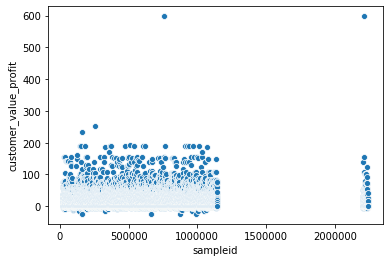

In [11]:
# 查看数据分布
sns.scatterplot(x='sampleid', y='customer_value_profit', data=df)

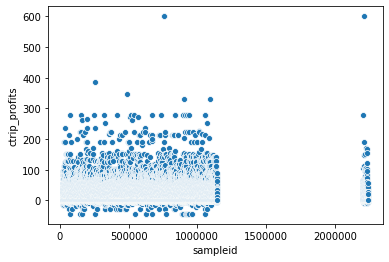

In [12]:
sns.scatterplot(x='sampleid', y='ctrip_profits', data=df)

In [13]:
filter_one = ['customer_value_profit', 'ctrip_profits']
filter_two = ['delta_price1', 'delta_price2', 'lowestprice']

for f in filter_one:
    rawdf.loc[rawdf[f]<0, f] = 0

for f in filter_two:
    rawdf.loc[rawdf[f]<0, f] = rawdf[f].median() # TODO: 需要知道为什么
    
rawdf[['customer_value_profit','ctrip_profits','delta_price1','delta_price2','lowestprice']].describe().T

,count,mean,std,min,25%,50%,75%,max
customer_value_profit,439123.0,3.052456,6.616664,0.0,0.269,0.991,3.138,598.064
ctrip_profits,445187.0,4.230381,9.295756,0.0,0.340,1.347,4.320,600.820
delta_price1,437146.0,185.575634,220.489219,0.0,81.000,81.000,226.000,5398.000
delta_price2,437750.0,165.948203,208.615285,0.0,69.000,69.000,198.000,5114.000
lowestprice,687931.0,318.806537,575.782302,1.0,116.000,200.000,380.000,100000.000


### 3.1.3 缺失值处理
#### 3.1.3.1 空值删除
- 特征值中只有iforderpv_24h、sid、h、day_advanced这四个是不存在缺失的,其他的44个特征都是存在缺失值的,并且大部分的缺失值都挺多的,因此需要对缺失值进行处理.

In [14]:
# 定义删除空值行列的函数
def nan_drop(df, axi, rate=0.5):
    df.dropna(axis=axi, thresh=df.shape[1-axi]*rate, inplace=True)  # thresh=n -> 这一行除去NA值，剩余数值的数量大于等于n
    
# 删除缺失值比例大于80%的行和列
print("删除空值前数据维度是:{}".format(rawdf.shape))

nan_drop(rawdf, axi=0, rate=0.2) # 行
nan_drop(rawdf, axi=1, rate=0.2) # 列

print("删除空值后数据维度是:{}".format(rawdf.shape))

删除空值前数据维度是:(689945, 49)
删除空值后数据维度是:(689845, 48)


#### 3.1.3.2 缺失值填充
- 趋于正态分布的字段,使用均值填充:businessrate_pre2、cancelrate_pre、businessrate_pre;  
- 偏态分布的字段,使用中位数填充.

In [15]:
def nan_fill(df):
    filter_mean = ['businessrate_pre2', 'cancelrate_pre', 'businessrate_pre']
    for col in df.columns:
        if col in filter_mean:
            df[col]=df[col].fillna(df[col].mean())
        else:
            df[col]=df[col].fillna(df[col].median())
    return df

rawdf = nan_fill(rawdf)


### 3.1.4 极值处理
- 有些特征明显有异常大和异常小的值，这里分别使用1%和99%分位数替换超过上下限的值.

In [16]:
for i in rawdf.columns:
    rawdf.loc[rawdf[i] < np.percentile(rawdf[i],1),i] = np.percentile(rawdf[i],1)
    rawdf.loc[rawdf[i] > np.percentile(rawdf[i],99),i] = np.percentile(rawdf[i],99)
    

### 3.2 相关性分析

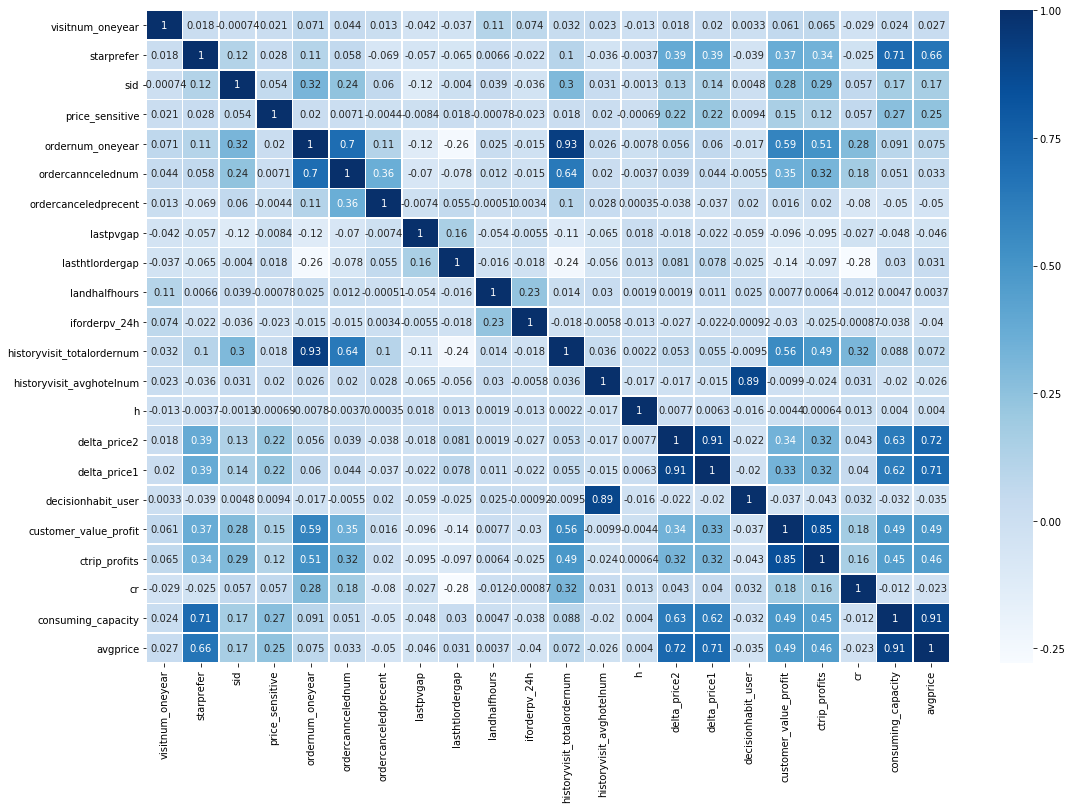

In [17]:
# 用户特征的相关性分析
user_features = ['visitnum_oneyear','starprefer','sid','price_sensitive','ordernum_oneyear','ordercanncelednum','ordercanceledprecent','lastpvgap',
               'lasthtlordergap','landhalfhours','iforderpv_24h','historyvisit_totalordernum','historyvisit_avghotelnum','h',
               'delta_price2','delta_price1','decisionhabit_user','customer_value_profit','ctrip_profits','cr','consuming_capacity','avgprice']

# 生成用户特征的相关性矩阵
corr_mat = rawdf[user_features].corr()

# 绘制用户特征的相关性矩阵热度图
fig, ax = plt.subplots(figsize=(18,12))
sns.heatmap(corr_mat, xticklabels=True, yticklabels=True, square=False, linewidths=.5, annot=True, cmap='Blues')
plt.savefig('C:/Users/zhuangshuting/Desktop/用户特征的相关性分析.jpg',dpi=400, bbox_inches='tight')
plt.show()

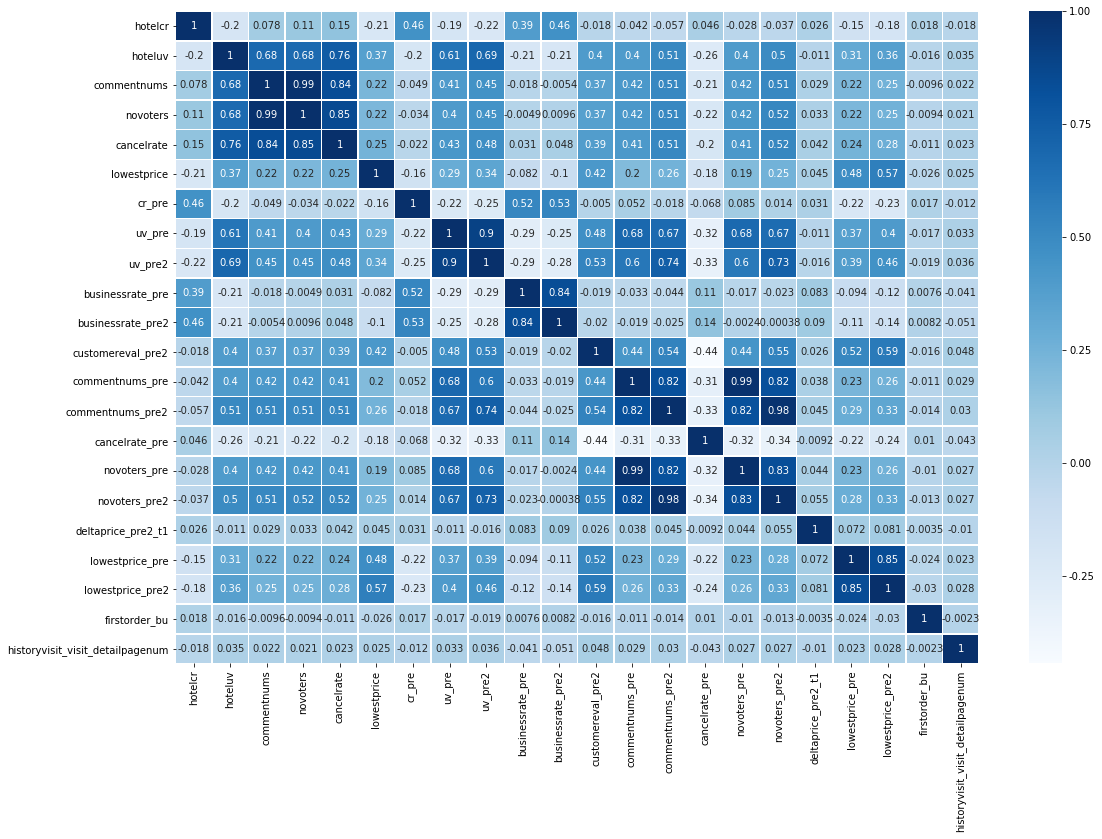

In [18]:
# 酒店信息特征的相关性分析
hotel_features=['hotelcr','hoteluv','commentnums','novoters','cancelrate','lowestprice','cr_pre','uv_pre','uv_pre2','businessrate_pre',
                'businessrate_pre2','customereval_pre2','commentnums_pre','commentnums_pre2','cancelrate_pre','novoters_pre','novoters_pre2',
                'deltaprice_pre2_t1','lowestprice_pre','lowestprice_pre2','firstorder_bu','historyvisit_visit_detailpagenum']

# 生成酒店特征的相关性矩阵
corr_mat1=rawdf[hotel_features].corr()

# 绘制酒店特征的相关性矩阵热度图
fig,ax = plt.subplots(figsize=(18, 12))
sns.heatmap(corr_mat1, xticklabels=True, yticklabels=True, square=False, linewidths=.5, annot=True, cmap='Blues')
plt.savefig('C:/Users/zhuangshuting/Desktop/酒店信息特征的相关性分析.jpg',dpi=400, bbox_inches='tight')
plt.show()

### 3.3 降维
#### 3.3.1 主成分分析法（PCA）  
- 是一种统计分析、简化数据集的方法。主成分分析经常用于减少数据集的维数，同时保留数据集当中对方差贡献最大的特征。这是通过保留低维主成分，忽略高维主成分做到的。这样低维成分往往能够保留住数据的最重要部分。但是，这也不是一定的，要视具体应用而定。由于主成分分析依赖所给数据，所以数据的准确性对分析结果影响很大。  

**相关性大于80%的变量进行降维。**

In [19]:
c_value = ['customer_value_profit', 'ctrip_profits']         # 用户价值
consume_level = ['avgprice', 'consuming_capacity']           # 用户消费水平
price_prefer = ['delta_price1', 'delta_price2']              # 用户偏好价格
hotel_hot = ['commentnums', 'novoters']                      # 酒店热度
hotel_hot_pre = ['commentnums_pre', 'novoters_pre']          # 24小时内浏览次数最多的酒店热度
hotel_hot_pre2 = ['commentnums_pre2', 'novoters_pre2']       # 24小时内浏览酒店的平均热度

from sklearn.decomposition import PCA
pca = PCA(n_components=1) # 把原始数据降到一维
rawdf['c_value'] = pca.fit_transform(rawdf[c_value])
rawdf['consume_level'] = pca.fit_transform(rawdf[consume_level])
rawdf['price_prefer'] = pca.fit_transform(rawdf[price_prefer])
rawdf['hotel_hot']=pca.fit_transform(rawdf[hotel_hot])
rawdf['hotel_hot_pre']=pca.fit_transform(rawdf[hotel_hot_pre])
rawdf['hotel_hot_pre2']=pca.fit_transform(rawdf[hotel_hot_pre2])

# 删除降维后多余的数据
rawdf.drop(c_value, axis=1, inplace=True)
rawdf.drop(consume_level,axis=1,inplace=True)
rawdf.drop(price_prefer,axis=1,inplace=True)
rawdf.drop(hotel_hot,axis=1,inplace=True)
rawdf.drop(hotel_hot_pre,axis=1,inplace=True)
rawdf.drop(hotel_hot_pre2,axis=1,inplace=True)
rawdf.drop('historyvisit_totalordernum', axis=1, inplace=True) # 把重复的一列删除

# 查看降维后的数据维度
print('PCA降维后数据维度是：{}'.format(df.shape))

PCA降维后数据维度是：(689945, 51)


### 3.4 数据标准化

In [20]:
from sklearn.preprocessing import StandardScaler as Std_Sca

y = rawdf['label']
x = rawdf.drop('label', axis=1)

scaler = Std_Sca()
scaler.fit(x)

X = scaler.transform(x)

In [21]:
X

array([[-0.49023827, -0.23602786, -0.48400114, ...,  0.08556503,
        -0.23726568, -0.2276806 ],
       [-0.49023827, -0.23602786, -0.01180249, ...,  2.51110485,
         2.51467536,  1.95436295],
       [-0.49023827, -0.23602786, -0.24790181, ..., -0.55817974,
         2.2041721 ,  2.06875329],
       ...,
       [-0.49023827, -0.23602786,  0.22429684, ...,  0.35729883,
         0.25833866,  1.23010303],
       [-0.49023827, -0.23602786, -0.48400114, ..., -0.64312908,
         0.59702838, -0.22650621],
       [-0.49023827, -0.23602786, -0.95619979, ..., -0.61074275,
        -0.70529847, -0.89149902]])

In [22]:
y

0         0.0
1         1.0
2         0.0
3         0.0
4         1.0
5         1.0
6         0.0
7         0.0
8         0.0
9         0.0
10        0.0
11        0.0
12        0.0
13        0.0
14        1.0
15        0.0
16        0.0
17        1.0
18        0.0
19        0.0
20        0.0
21        0.0
22        0.0
23        1.0
24        0.0
25        0.0
26        0.0
27        1.0
28        0.0
29        0.0
         ... 
689915    0.0
689916    0.0
689917    0.0
689918    0.0
689919    1.0
689920    0.0
689921    0.0
689922    0.0
689923    0.0
689924    0.0
689925    0.0
689926    0.0
689927    0.0
689928    0.0
689929    0.0
689930    0.0
689931    0.0
689932    1.0
689933    0.0
689934    0.0
689935    0.0
689936    0.0
689937    0.0
689938    0.0
689939    1.0
689940    1.0
689941    1.0
689942    0.0
689943    0.0
689944    0.0
Name: label, Length: 689845, dtype: float64

## 四、建模与模型评估

- 数据集的划分原则上应当在缺失值和异常值处理之前就进行，也就是说从数据预处理阶段开始，验证集和测试集就不应参与到模型构建的各个阶段中来，而应仅使用训练集得到的信息，这样才能有效严谨的保证模型验证和评估不会出现潜在的过拟合问题。

In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=460)

### 4.1 逻辑回归

In [24]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import classification_report as CR
from sklearn import metrics

# 实例化一个LR模型
lr = LR()  

# 训练模型
lr.fit(X_train, y_train)  

# 预测1类的概率
y_prob = lr.predict_proba(X_test)[:,1] 

# 模型对测试集的预测结果
y_pred = lr.predict(X_test)

# 获取伪阳率，真阳率，阈值
fpr_lr, tpr_lr, threshold_lr = metrics.roc_curve(y_test, y_prob)

# AUC得分
auc_lr = metrics.auc(fpr_lr, tpr_lr)

# 模型准确率
score_lr = metrics.accuracy_score(y_test, y_pred)

print('模型准确率为：{0}, AUC准确率为：{1}'.format(score_lr, auc_lr))
print('=================================================================')
print(CR(y_test, y_pred, labels=None, target_names=None, sample_weight=None, digits=2))

模型准确率为：0.737426523349448, AUC准确率为：0.7001823400739092
              precision    recall  f1-score   support

         0.0       0.75      0.96      0.84     99919
         1.0       0.59      0.16      0.26     38050

    accuracy                           0.74    137969
   macro avg       0.67      0.56      0.55    137969
weighted avg       0.70      0.74      0.68    137969



- precision：精准率
- recall：召回率
- f1-score：F1值
- 宏平均（Macro-averaging），是先对每一个类统计指标值，然后在对所有类求算术平均值。
- 微平均（Micro-averaging），是对数据集中的每一个实例不分类别进行统计建立全局混淆矩阵，然后计算相应指标。

### 4.2 朴素贝叶斯

In [25]:
from sklearn.naive_bayes import GaussianNB

# 实例化一个贝叶斯模型
gnb = GaussianNB()

# 训练模型
gnb.fit(X_train, y_train)

# 预测1类的概率
y_prob = gnb.predict_proba(X_test)[:,1]

# 模型对测试集的预测结果
y_pred = gnb.predict(X_test)

# 获取伪阳率、真阳率、阈值
fpr_gnb, tpr_gnb, threshold_gnb = metrics.roc_curve(y_test, y_prob)

# AUC得分
auc_gnb = metrics.auc(fpr_gnb, tpr_gnb)

# 模型准确率
score_gnb = metrics.accuracy_score(y_test, y_pred)

print('模型准确率为:{0}, AUC得分为:{1}'.format(score_gnb, auc_gnb))
print('=================================================================')
print(CR(y_test, y_pred, labels=None, target_names=None, sample_weight=None, digits=2))

模型准确率为:0.6370996383245512, AUC得分为:0.6661735004039211
              precision    recall  f1-score   support

         0.0       0.81      0.66      0.72     99919
         1.0       0.39      0.59      0.47     38050

    accuracy                           0.64    137969
   macro avg       0.60      0.62      0.60    137969
weighted avg       0.69      0.64      0.65    137969



### 4.3 支持向量机

In [26]:
from sklearn.svm import SVC

# 训练模型
svc = SVC(kernel='rbf', C=1, max_iter=100).fit(X_train, y_train)

# 决策边界距离
y_prob = svc.decision_function(X_test)

# 模型对测试集的预测结果
y_pred = svc.predict(X_test)

# 获取伪阳率、真阳率、阈值
fpr_svc, tpr_svc, threshold_svc = metrics.roc_curve(y_test, y_prob)

# AUC得分
auc_svc = metrics.auc(fpr_svc, tpr_svc)

# 模型准确率
score_svc = metrics.accuracy_score(y_test, y_pred)

print('模型准确率为:{0}, AUC得分为:{1}'.format(score_svc, auc_svc))
print('=================================================================')
print(CR(y_test, y_pred, labels=None, target_names=None, sample_weight=None, digits=2))

模型准确率为:0.5502105545448616, AUC得分为:0.49365110312283306
              precision    recall  f1-score   support

         0.0       0.72      0.62      0.67     99919
         1.0       0.27      0.36      0.31     38050

    accuracy                           0.55    137969
   macro avg       0.49      0.49      0.49    137969
weighted avg       0.59      0.55      0.57    137969



### 4.4 决策树

In [27]:
from sklearn import tree

# 建立决策树模型
dtc = tree.DecisionTreeClassifier()

# 训练模型
dtc.fit(X_train, y_train)

# 预测1类的概率
y_prob = dtc.predict_proba(X_test)[:, 1]

# 模型对测试集的预测结果
y_pred = dtc.predict(X_test)

# 获取伪阳率、真阳率、阈值
fpr_dtc, tpr_dtc, threshold_dtc = metrics.roc_curve(y_test, y_prob)

# AUC得分
auc_dtc = metrics.auc(fpr_dtc, tpr_dtc)

# 模型准确率
score_dtc = metrics.accuracy_score(y_test, y_pred)

print('模型准确率为：{0}，AUC得分为：{1}'.format(score_dtc, auc_dtc))
print('=============================================================')
print(CR(y_test, y_pred, labels=None, target_names=None, sample_weight=None, digits=2))

模型准确率为：0.8819444947778124，AUC得分为：0.8556870066067576
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92     99919
         1.0       0.78      0.80      0.79     38050

    accuracy                           0.88    137969
   macro avg       0.85      0.86      0.85    137969
weighted avg       0.88      0.88      0.88    137969



### 4.5 随机森林

In [28]:
from sklearn.ensemble import RandomForestClassifier as RFC

# 建立随机森林模型
rfc = RFC()

# 训练模型
rfc.fit(X_train, y_train)

# 预测1类的概率
y_prob = rfc.predict_proba(X_test)[:, 1]

# 模型对测试集的预测结果
y_pred = rfc.predict(X_test)

# 获取伪阳率、真阳率、阈值
fpr_rfc, tpr_rfc, threshold_rfc = metrics.roc_curve(y_test, y_prob)

# AUC得分
auc_rfc = metrics.auc(fpr_rfc, tpr_rfc)

# 模型准确率
score_rfc = metrics.accuracy_score(y_test, y_pred)

print('模型准备率为:{0}, AUC得分为:{1}'.format(score_rfc, auc_rfc))
print('============================================================')
print(CR(y_test, y_pred, labels=None, target_names=None, sample_weight=None, digits=2))

模型准备率为:0.901738796396292, AUC得分为:0.948355742921806
              precision    recall  f1-score   support

         0.0       0.89      0.98      0.94     99919
         1.0       0.94      0.69      0.79     38050

    accuracy                           0.90    137969
   macro avg       0.92      0.84      0.86    137969
weighted avg       0.91      0.90      0.90    137969



### 4.6 XGBoost

In [30]:
import xgboost as xgb

# 读入训练数据集和测试集
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test)

# 设置xgboost建模参数
params = {'booster':'gbtree','objective': 'binary:logistic',
          'eval_metric': 'auc','max_depth':8,'gamma':0,
          'lambda':2,'subsample':0.7,'colsample_bytree':0.8,
          'min_child_weight':3,'eta': 0.2,'nthread':8, 'silent':1}

# 训练模型
watchlist = [(dtrain, 'train')]
bst = xgb.train(params, dtrain, num_boost_round=500, evals=watchlist)

# 输入预测为正类的概率值
y_prob = bst.predict(dtest)

# 设置阈值为0.5，得到测试集的预测结果
y_pred = (y_prob >= 0.5) * 1

# 获取伪阳率、真阳率、阈值
fpr_xgb, tpr_xgb, threshold_xgb = metrics.roc_curve(y_test, y_prob)

# AUC得分
auc_xgb = metrics.auc(fpr_xgb, tpr_xgb)

# 模型准确率
score_xgb = metrics.accuracy_score(y_test, y_pred)

print('模型准确率为：{0}，AUC得分为：{1}'.format(score_xgb, auc_xgb))
print('============================================================')
print(CR(y_test, y_pred, labels=None, target_names=None, sample_weight=None, digits=2))

[22:24:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.71064
[1]	train-auc:0.73188
[2]	train-auc:0.73903
[3]	train-auc:0.74844
[4]	train-auc:0.75258
[5]	train-auc:0.75571
[6]	train-auc:0.75981
[7]	train-auc:0.76385
[8]	train-auc:0.76711
[9]	train-auc:0.77015
[10]	train-auc:0.77272
[11]	train-auc:0.77592
[12]	train-auc:0.77936
[13]	train-auc:0.78173
[14]	train-auc:0.78436
[15]	train-auc:0.78609
[16]	train-auc:0.78811
[17]	train-auc:0.78957
[18]	train-auc:0.79173
[19]	train-auc:0.79342
[20]	train-auc:0.79623
[21]	train-auc:0.79812
[22]	train-auc:0.79965
[23]	train-auc:0.80224
[24]	train-auc:0.80464
[25]	train-auc:0.80592
[26]	train-auc:0.80813
[27]	

### 4.7 模型比较
- 根据上述模型的准确率以及AUC得分，我们可以看到随机森林以及XGBoost的表现最佳。但由于XGBoost更为耗时，且其准确率和AUC得分均低于随机森林，故我们可采用随机森林作为最终的模型。同时，我们可以看看个模型ROC曲线的表现（这里随机森林模型不知道为什么没有显示出来，估计是和XGBoost的重合了）：

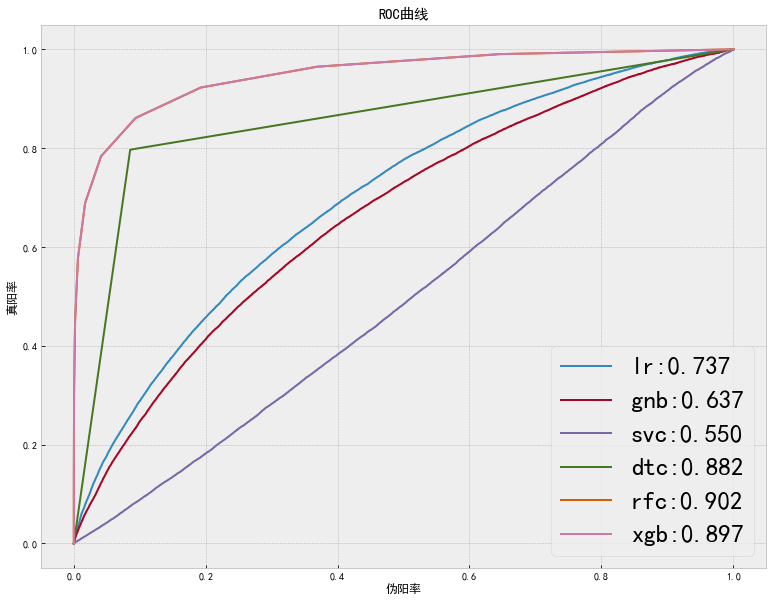

In [43]:
plt.style.use('bmh')
plt.figure(figsize=(13,10))

# 逻辑回归
plt.plot(fpr_lr,tpr_lr,label='lr:{0:.3f}'.format(score_lr)) 

# 朴素贝叶斯
plt.plot(fpr_gnb,tpr_gnb,label='gnb:{0:.3f}'.format(score_gnb))

# 支持向量机
plt.plot(fpr_svc,tpr_svc,label='svc:{0:.3f}'.format(score_svc)) 

# 决策树
plt.plot(fpr_dtc,tpr_dtc,label='dtc:{0:.3f}'.format(score_dtc)) 

# 随机森林
plt.plot(fpr_rfc,tpr_rfc,label='rfc:{0:.3f}'.format(score_rfc))         

# XGBoost
plt.plot(fpr_rfc,tpr_rfc,label='xgb:{0:.3f}'.format(score_xgb))         

plt.legend(loc='lower right', prop={'size':25})
plt.xlabel('伪阳率')
plt.ylabel('真阳率')
plt.title('ROC曲线')
plt.savefig('C:/Users/zhuangshuting/Desktop/模型比较图.jpg', dpi=400, bbox_inches='tight')
plt.show()

### 4.8 重要性特征
- 由于携程数据集的特征较多，我们可以通过XGBoost的plot_importance来辨别哪些是重要性特征，其原理是F score方差分析法。

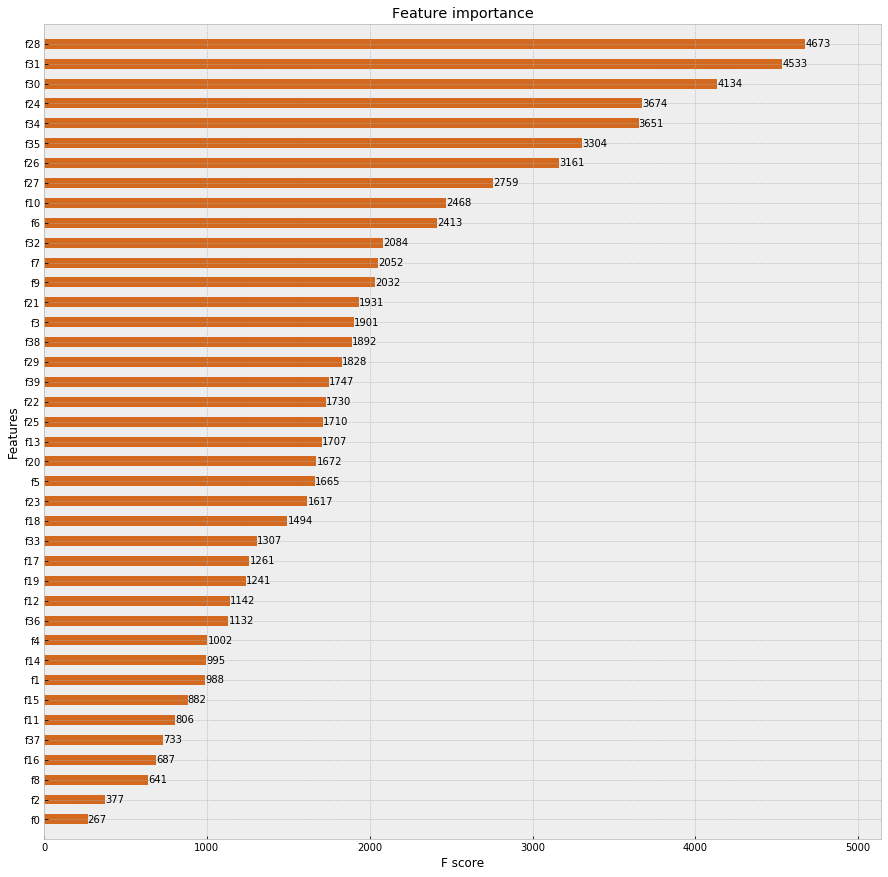

In [32]:
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(15,15))
plot_importance(bst, height=0.5, ax=ax, max_num_features=40, color='chocolate')
plt.savefig('C:/Users/zhuangshuting/Desktop/重要性特征图.jpg', dpi=400, bbox_inches='tight')
plt.show()

从上图可以看到，较为重要的特征为：
- 24小时内是否访问订单填写页（iforderpv_24h）
- 近3个月用户历史日均访问酒店数（historyvisit_avghotelnum）
- 当前酒店转换率（hotelcr）
- 当前酒店历史订单取消率（ordercanceledprecent）
- 星级偏好（starprefer）
- 用户历史取消率（cancelrate）
- 7天内访问酒店详情页数（historyvisit_visit_detailpagenum）
- 价格敏感指数（price_sensitive）
- 当前酒店访客量（hoteluv）
- 浏览最多的酒店商务属性（businessrate_pre）

## 五、RFM模型和用户画像

### 5.1 RFM分析  

RFM模型，即为：

- R(Rencency):最近一次消费
- F(Frequency):消费频率
- M(Monetary):消费金额
  
选择lasthtlordergap(距离上次下单的时长)、ordernum_oneyear(用户年订单数)、consume_level(用户消费水平)分别作为R、F、M的值,对我们的用户群体进行聚类.

In [33]:
rfm = rawdf[['lasthtlordergap','ordernum_oneyear','consume_level']]

# 归一化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(rfm)
rfm = pd.DataFrame(scaler.transform(rfm),columns=['recency','frequency','monetary'])

# 分箱
rfm['R']=pd.qcut(rfm["recency"], 2)
rfm['F']=pd.qcut(rfm["frequency"], 2)
rfm['M']=pd.qcut(rfm["monetary"], 2)

# 编码
from sklearn.preprocessing import LabelEncoder
rfm['R']=LabelEncoder().fit(rfm['R']).transform(rfm['R'])
rfm['F']=LabelEncoder().fit(rfm['F']).transform(rfm['F'])
rfm['M']=LabelEncoder().fit(rfm['M']).transform(rfm['M'])

def get_label(r,f,m):
    if (r==0)&(f==1)&(m==1):
        return '高价值客户'
    if (r==1)&(f==1)&(m==1):
        return '重点保持客户'
    if((r==0)&(f==0)&(m==1)):
        return '重点发展客户'
    if (r==1)&(f==0)&(m==1):
        return '重点挽留客户'
    if (r==0)&(f==1)&(m==0):
        return '一般价值客户'
    if (r==1)&(f==1)&(m==0):
        return '一般保持客户'
    if (r==0)&(f==0)&(m==0):
        return '一般发展客户'
    if (r==1)&(f==0)&(m==0):
        return '潜在客户'
    
def RFM_convert(df):
    df['Label of Customer']=df.apply(lambda x:get_label(x['R'],x['F'],x['M']),axis=1)
    
    df['R']=np.where(df['R']==0,'高','低')
    df['F']=np.where(df['F']==1,'高','低')
    df['M']=np.where(df['M']==1,'高','低')
    
    return df[['R','F','M','Label of Customer']]

rfm0=RFM_convert(rfm)
rfm0.head(10)

,R,F,M,Label of Customer
0,高,低,高,重点发展客户
1,高,低,低,一般发展客户
2,高,低,低,一般发展客户
3,高,低,低,一般发展客户
4,高,低,低,一般发展客户
5,高,低,低,一般发展客户
6,高,低,低,一般发展客户
7,高,高,高,高价值客户
8,高,低,低,一般发展客户
9,高,高,低,一般价值客户


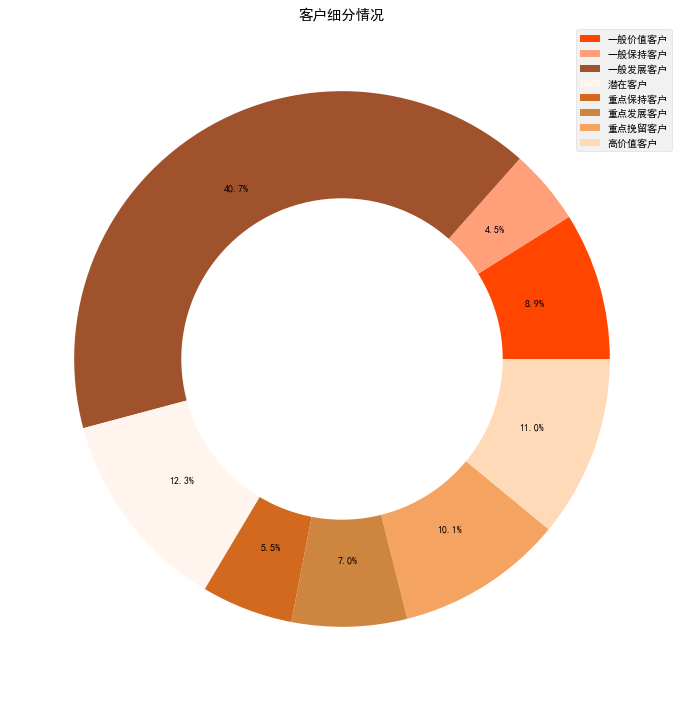

In [39]:
temp=rfm0.groupby('Label of Customer').size()

plt.figure(figsize=(12,18))
colors=['orangered','lightsalmon','sienna','seashell','chocolate','peru','sandybrown','peachpuff']
plt.pie(temp,radius=1,autopct='%.1f%%',pctdistance=0.75,colors=colors)
plt.pie([1],radius=0.6,colors='w')
plt.title('客户细分情况')
plt.legend(temp.index)
plt.savefig('C:/Users/zhuangshuting/Desktop/客户细分情况.jpg',dpi=400, bbox_inches='tight')
plt.show()

- 潜在客户占比达12.3%，这类客户是RFM指标均不是很好的客户，有待开发;
- 高价值客户11%，重点保持客户10%，重点发展客户7%，这是要重点关注的客户群体

### 5.2 用户画像

In [35]:
# 选取几个刻画用户的重要指标
user_feature = ['decisionhabit_user','ordercanncelednum','ordercanceledprecent','consume_level','starprefer','lasthtlordergap','lastpvgap','h','sid',
                'c_value','landhalfhours','price_sensitive','price_prefer','day_advanced','historyvisit_avghotelnum','ordernum_oneyear']
user_attributes = rawdf[user_feature]
user_attributes.head()

,decisionhabit_user,ordercanncelednum,ordercanceledprecent,consume_level,starprefer,lasthtlordergap,lastpvgap,h,sid,c_value,landhalfhours,price_sensitive,price_prefer,day_advanced,historyvisit_avghotelnum,ordernum_oneyear
0,3.0,2.0,0.25,-44.490247,69.4,46890.0,2848.0,12.0,7.0,-1.996045,22.0,16.0,-85.174746,0.0,4.0,6.0
1,3.0,2.0,0.25,-44.490247,69.4,46890.0,2848.0,14.0,33.0,-1.996045,0.0,16.0,-85.174746,0.0,4.0,6.0
2,3.0,2.0,0.25,-44.490247,69.4,46890.0,2848.0,19.0,10.0,-1.996045,3.0,16.0,-85.174746,1.0,4.0,6.0
3,3.0,2.0,0.25,-44.490247,69.4,46890.0,2848.0,16.0,8.0,-1.996045,2.0,16.0,-85.174746,0.0,4.0,6.0
4,3.0,2.0,0.25,-44.490247,69.4,46890.0,2848.0,21.0,1.0,-1.996045,0.0,16.0,-85.174746,1.0,4.0,6.0


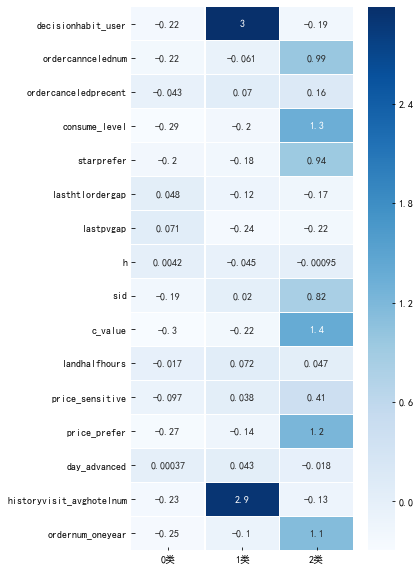

In [42]:
# 数据标准化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(user_attributes)

user_attributes = scaler.transform(user_attributes)

# 利用K-Means进行聚类
from sklearn.cluster import KMeans

Kmeans = KMeans(n_clusters=3)                                                     
Kmeans.fit(user_attributes)                                                     
k_char = Kmeans.cluster_centers_ # 得到每个分类的质心
personas = pd.DataFrame(k_char.T, index=user_feature, columns=['0类', '1类', '2类'])  # 用户画像表

plt.figure(figsize=(5, 10))
sns.heatmap(personas, xticklabels=True, yticklabels=True, square=False, linewidths=.5, annot=True, cmap='Blues')
plt.savefig('C:/Users/zhuangshuting/Desktop/用户画像表.jpg', dpi=400, bbox_inches='tight')
plt.show()

- 2类用户的R(lasthtlordergap)为-0.17非常小(R越小越好,这里是反的),F(ordernum_oneyear)为1.1比较高了，M(consume_level)为1.3也几乎是最高的，很明显，2类客户为我们的"高价值客户"；
- 而0类中几乎都是白格子，无论是客户价值还是消费水平值都是最低的，很明显，这一类我们将其归为"低价值客户"；
- 剩下的1类我们将其称为"中等群体".

<Figure size 648x648 with 0 Axes>

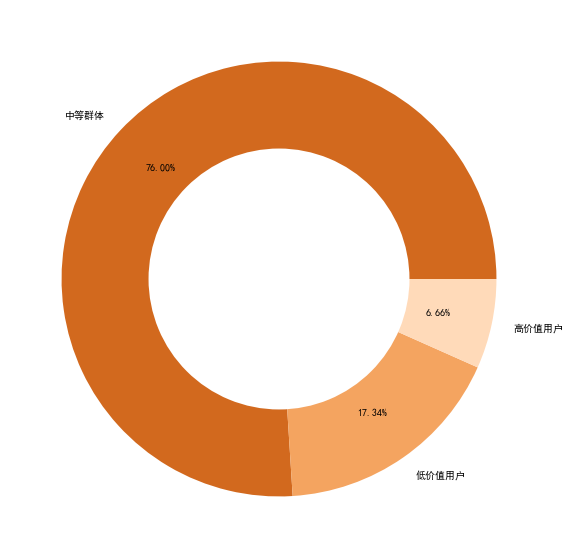

In [41]:
plt.figure(figsize=(9,9))

# 每个类别的用户个数
class_k=list(Kmeans.labels_)                      
# 每个类别用户个数占比
percent=[class_k.count(1)/len(user_attributes),class_k.count(0)/len(user_attributes),class_k.count(2)/len(user_attributes)]   

fig, ax = plt.subplots(figsize=(10,10))
colors=['chocolate','sandybrown','peachpuff']
types=['中等群体','低价值用户','高价值用户']
ax.pie(percent,radius=1,autopct='%.2f%%',pctdistance=0.75,colors=colors,labels=types)
ax.pie([1], radius=0.6,colors='w')
plt.savefig('C:/Users/zhuangshuting/Desktop/用户画像.jpg',dpi=400, bbox_inches='tight')
plt.show()

### 5.3 用户画像分析

### 5.3.1 高价值用户分析
  
消费水平高，客户价值大，追求高品质，对酒店星级要求高，访问频率和预定频率都较高，提前预定的时间都较短，决策一般都较快（日均访问数少），订单取消率较高，可以分析出这类客户商务属性偏重，可能随时要出差，因此都不会提前预定，可能出差随时会取消，因此酒店取消率也会更高一点。sid的值较大，说明高价值客户群体多集中在老客户中。价格敏感度较高，说明可能比较要求性价比。h值非常小，可能访问和预定时间多在半夜或是清晨。

这部分客户对于我们而言是非常重要的，因此我们需要对其实施个性化的营销：

- 1、为客户提供更多差旅地酒店信息;  
- 2、多推荐口碑好、性价比高的商务酒店连锁酒店房源吸引用户;  
- 3、在非工作日的11点、17点等日间流量小高峰时段进行消息推送。  


### 5.3.2 中等群体分析  
消费水平和客户价值都偏低，对酒店品质也不太追求，访问和预定频率也都较高，提前预定的时间是三类中最长的，最值得注意的是，0类客户中有两个颜色非常深的蓝色格子，是用户决策和近3个月的日均访问数。可以看出，这类客户通常很喜欢逛酒店界面，在决定要订哪家酒店前通常会花费非常多的时间进行浏览才能做出选择，并且一般都会提前很久订好房。我们可以给这类客户打上“谨慎”的标签。我们可以合理推断，这一类客户，可能预定酒店的目的多为出门旅行。

针对这部分客户，我们需要：

- 1、在节假日前两、三星期定期推送国外高星级酒店，尽可能多地进行推送，因为此类客户通常比较喜欢浏览；
- 2、推送高端酒店以及当地的旅行资讯，吸引用户关注，因为这类客户旅游出行的概率较大；
- 3、和景区酒店代理商合作，针对此类用户制定个性化推荐，多推荐价格相对实惠的酒店。

### 5.3.3 低价值用户分析

消费水平和客户价值极低，对酒店品质不追求，偏好价格较低，决策时间很短，访问和预定频率很低，sid值很低，说明新客户居多。

针对这部分客户，我们需要：

- 1、不建议花费过多营销成本，但因为新用户居多，属于潜在客户，建议把握用户初期体验（如初期消费有优惠、打卡活动等），还可以定期推送实惠的酒店给此类用户，以培养客户消费惯性为主；
- 2、推送的内容应多为大减价、大酬宾、跳楼价之类的；
- 3、由于这部分用户占比较多，可结合该群体流失情况分析流失客户因素，进行该群体市场的开拓，进一步进行下沉分析，开拓新的时长。